In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm # для выполнения не из jupyter: from tqdm import tqdm

# Параметры задачи

In [2]:
N_POINTS = 41
DOMAIN_SIZE = 1.0 # линейные размеры стороны расчётной области, единичная длина и ширина
N_ITERATIONS = 500 # число итераций решения
TIME_STEP_LENGTH = 0.001
KINEMATIC_VISCOSITY = 0.1 # кин. вязкость
DENSITY = 1.0 # 
HORIZONTAL_VELOCITY_TOP = 1.0 # скорость на верхней границе

N_PRESSURE_POISSON_ITERATIONS = 50
STABILITY_SAFETY_FACTOR = 0.5

# Расчётная сетка (массивы для хранения параметров потока)

## Геометрические сетки X и Y

Сетки хранят геометрические координаты границ ячеек

In [3]:
element_length = DOMAIN_SIZE / (N_POINTS - 1)
x = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
y = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)

X, Y = np.meshgrid(x, y)

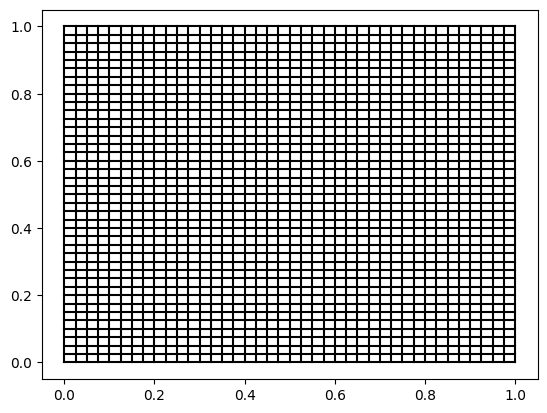

In [4]:
plt.plot(X, Y, "-k") # use plot, not scatter
plt.plot(np.transpose(X), np.transpose(Y), "-k") # add this here
plt.show()

In [5]:
print("Сетка X:\n", X, "\n")
print("Сетка Y:\n", Y)

Сетка X:
 [[0.    0.025 0.05  ... 0.95  0.975 1.   ]
 [0.    0.025 0.05  ... 0.95  0.975 1.   ]
 [0.    0.025 0.05  ... 0.95  0.975 1.   ]
 ...
 [0.    0.025 0.05  ... 0.95  0.975 1.   ]
 [0.    0.025 0.05  ... 0.95  0.975 1.   ]
 [0.    0.025 0.05  ... 0.95  0.975 1.   ]] 

Сетка Y:
 [[0.    0.    0.    ... 0.    0.    0.   ]
 [0.025 0.025 0.025 ... 0.025 0.025 0.025]
 [0.05  0.05  0.05  ... 0.05  0.05  0.05 ]
 ...
 [0.95  0.95  0.95  ... 0.95  0.95  0.95 ]
 [0.975 0.975 0.975 ... 0.975 0.975 0.975]
 [1.    1.    1.    ... 1.    1.    1.   ]]


## Массивы для хранения ${v_x}$, ${v_x}$, ${p}$ и их инициализация 

Массивы объявляются по подобию прототипа - X, и сразу инициализируются (заполняются нулями)

In [5]:
vx_prev = np.zeros_like(X)
vy_prev = np.zeros_like(X)
p_prev = np.zeros_like(X)

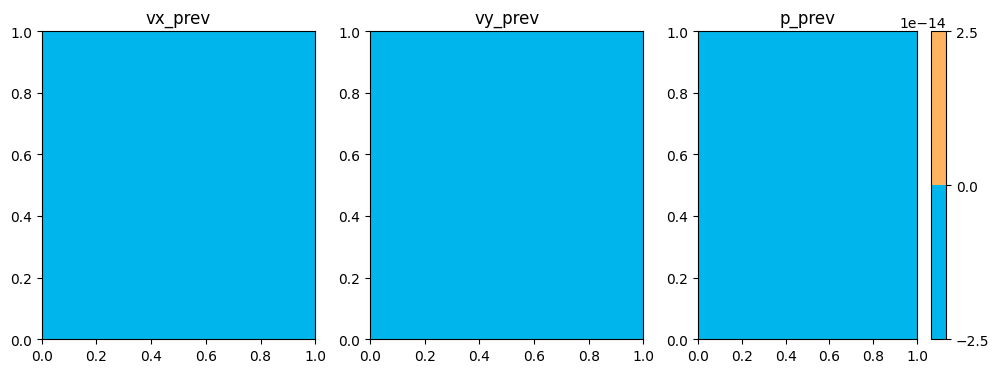

In [6]:
plt.figure(figsize=[12, 4])

plt.subplot(1,3,1, title="vx_prev")
plt.contourf(X[::2, ::2], Y[::2, ::2], vx_prev[::2, ::2], cmap="rainbow")

plt.subplot(1,3,2, title="vy_prev")
plt.contourf(X[::2, ::2], Y[::2, ::2], vy_prev[::2, ::2], cmap="rainbow")

plt.subplot(1,3,3, title="p_prev")
plt.contourf(X[::2, ::2], Y[::2, ::2], p_prev[::2, ::2], cmap="rainbow")

plt.colorbar()

# Операторы 

Функция для расчёта разности величины по x, в дискретном виде, для всей сетки, по формуле

${\dfrac{\partial{U}}{\partial{x}}=\dfrac{U_{x_{i-1},y_j}-U_{x_{i+1},y_j}}{2 \Delta{x}} }$

In [7]:
def ddx(f):
    diff = np.zeros_like(f)
    diff[1:-1, 1:-1] = ( f[1:-1, 2: ] - f[1:-1, 0:-2] ) / ( 2 * element_length )
    return diff

Функция для расчёта разности величины по y, в дискретном виде, для всей сетки, по формуле

${\dfrac{\partial{U}}{\partial{y}}=\dfrac{U_{x_i,y_{j+1}}-U_{x_i,y_{j-1}}}{2 \Delta{y}} }$

In [8]:
def ddy(f):
    diff = np.zeros_like(f)
    diff[1:-1, 1:-1] = ( f[2:  , 1:-1] - f[0:-2, 1:-1] ) / ( 2 * element_length )
    return diff

Функция для расчёта оператора Лапласа, в дискретном виде, для всей сетки, по формуле

${\Delta{U}=\dfrac{U_{x_{i},y_{j-1}}+U_{x_{i-1},y_j}-4U_{x_{i},y_j}+U_{x_{i},y_{j+1}}+U_{x_{i+1},y_{j}}} {\Delta{x}\Delta{y} } }$

In [9]:
def laplace(f):
    diff = np.zeros_like(f)
    diff[1:-1, 1:-1] = (
        f[1:-1, 0:-2] + f[0:-2, 1:-1] - 4 * f[1:-1, 1:-1] + f[1:-1, 2: ] + f[2: , 1:-1]
    ) / ( element_length**2 )
    return diff

# Вспомогательные операции

In [10]:
maximum_possible_time_step_length = ( 0.5 * element_length**2 / KINEMATIC_VISCOSITY)
if TIME_STEP_LENGTH > STABILITY_SAFETY_FACTOR * maximum_possible_time_step_length:
    raise RuntimeError("Stability is not guarenteed")

# Решение демонстрационное пошаговое

Система уравнений:

${\partial{\vec{v}}/\partial{t} + (\vec{v} \cdot \nabla) \vec{v} = \nu \nabla^2{\vec{v}}}$

${\nabla^2{p}= \rho/\Delta{t} \nabla \cdot \vec{v}}$

# Решение (до N итераций)

Система уравнений:

${\partial{\vec{v}}/\partial{t} + (\vec{v} \cdot \nabla) \vec{v} = \nu \nabla^2{\vec{v}}}$

${\nabla^2{p}= \rho/\Delta{t} \nabla \cdot \vec{v}}$

  0%|          | 0/500 [00:00<?, ?it/s]

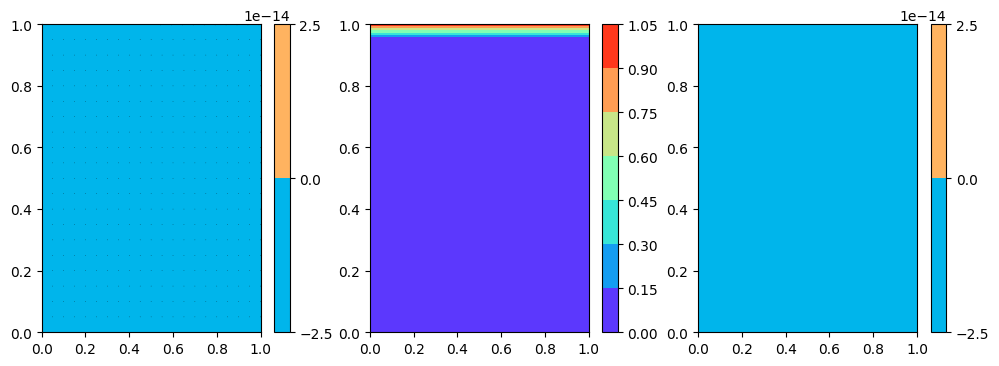

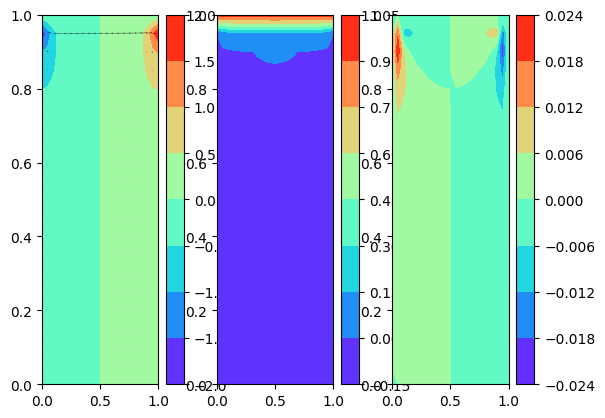

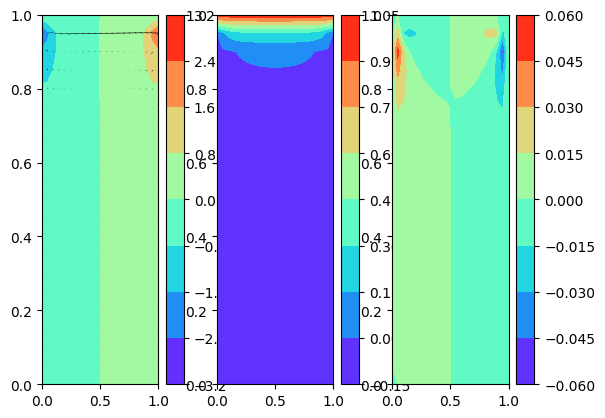

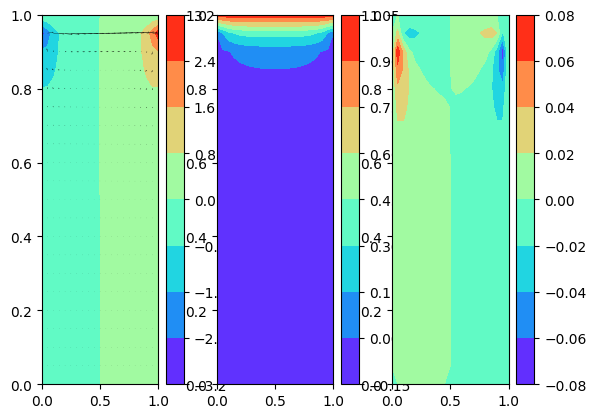

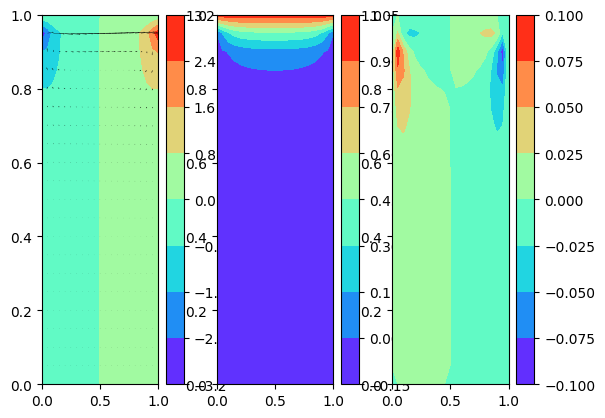

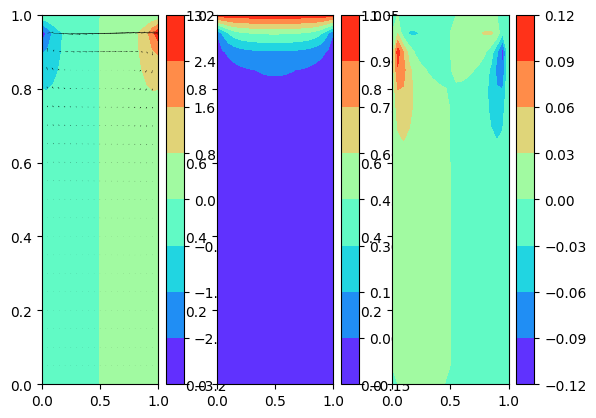

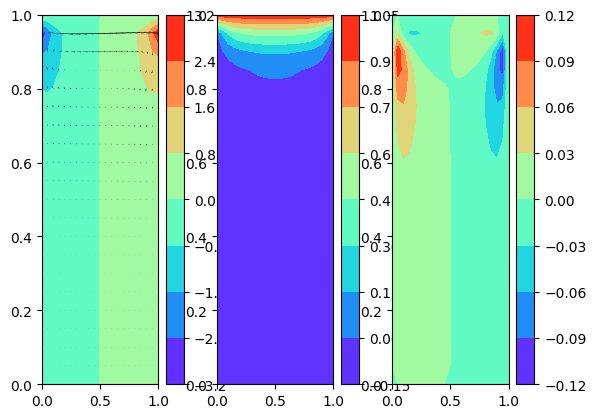

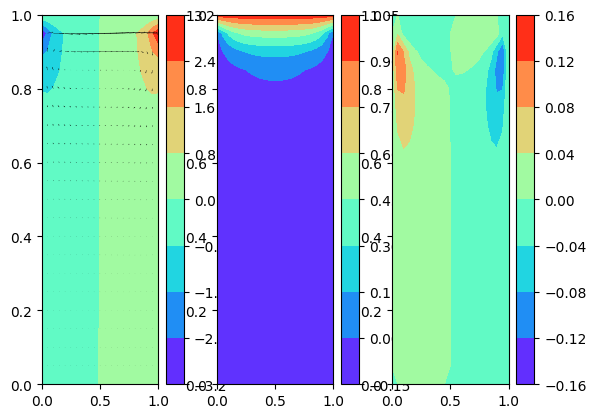

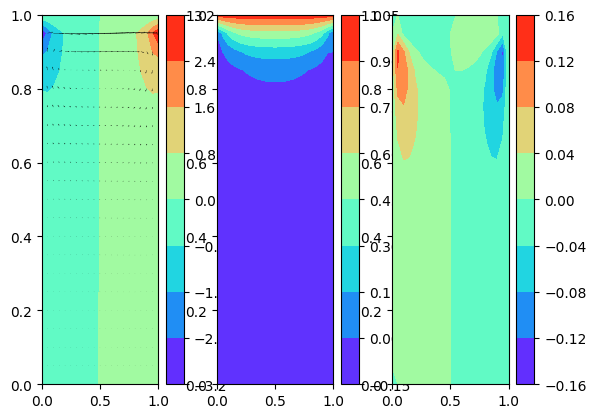

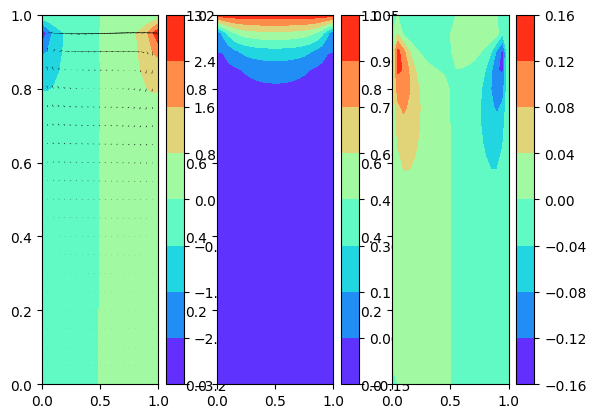

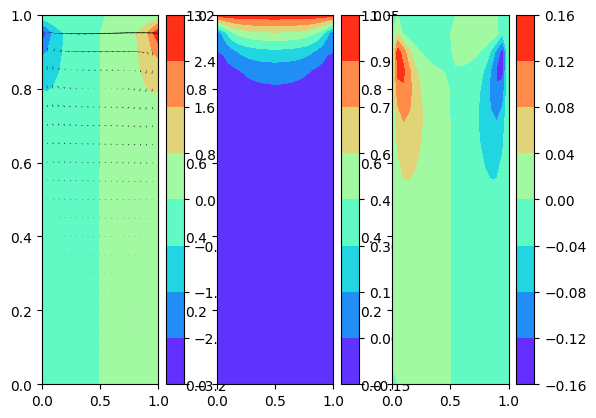

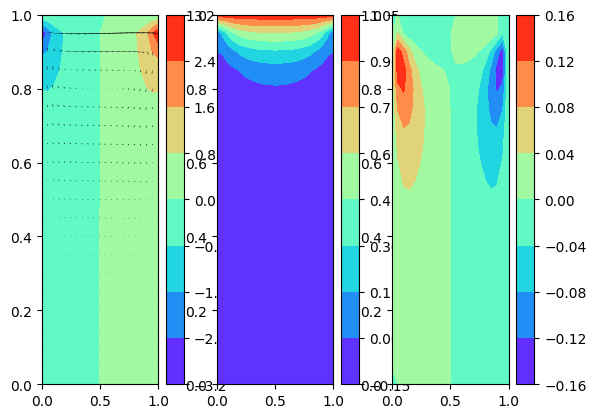

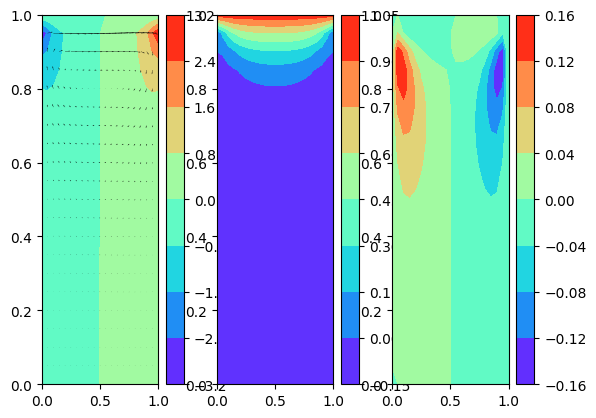

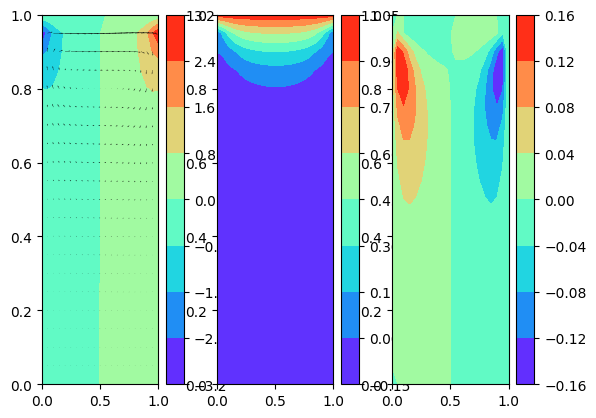

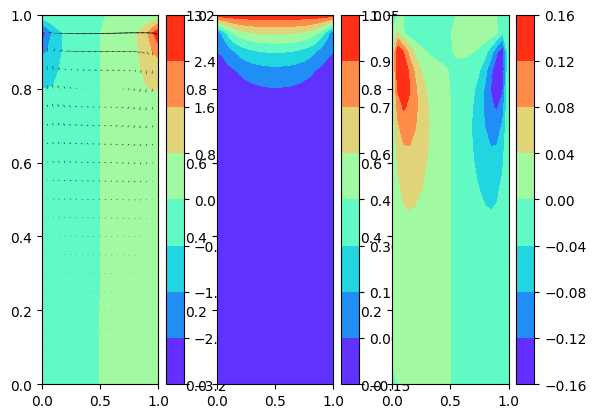

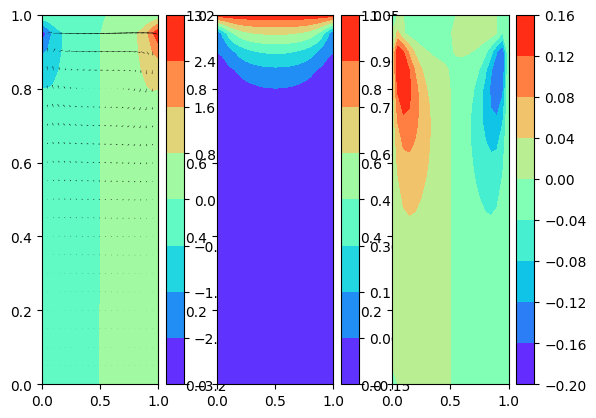

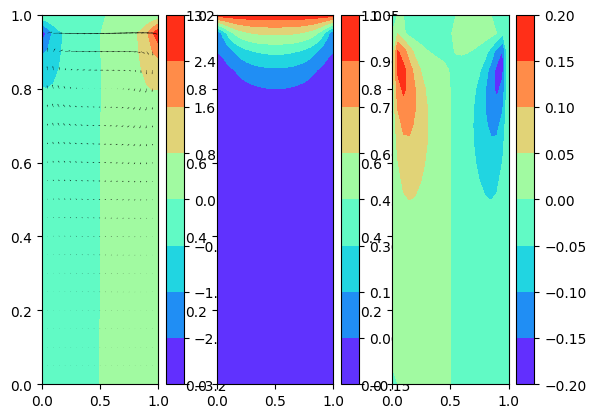

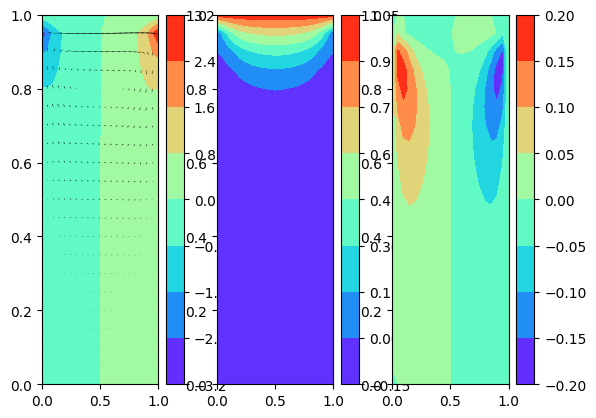

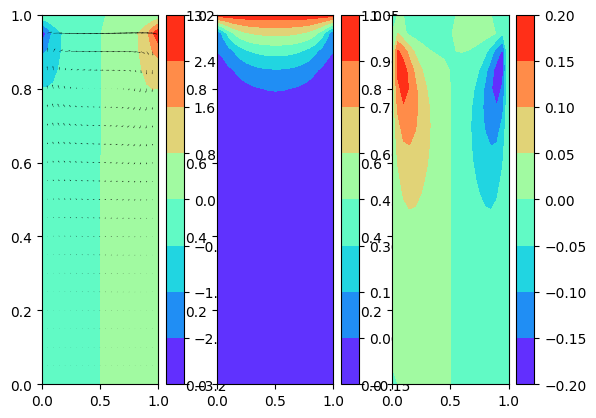

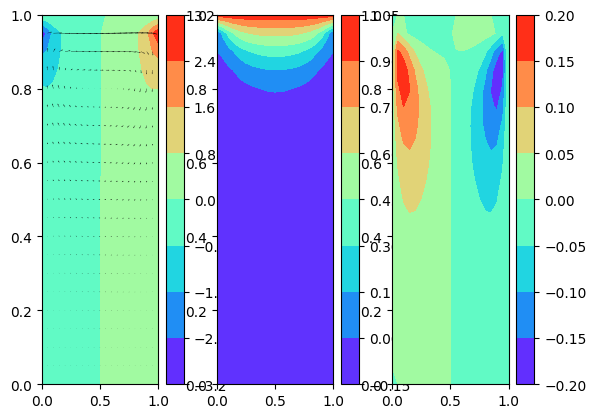

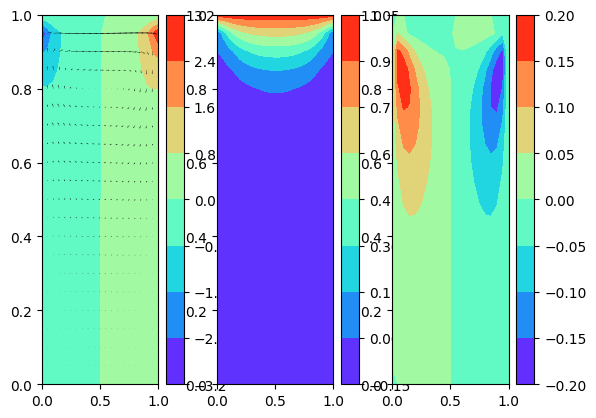

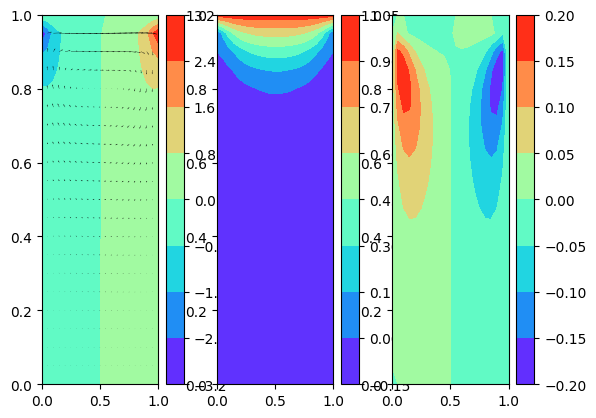

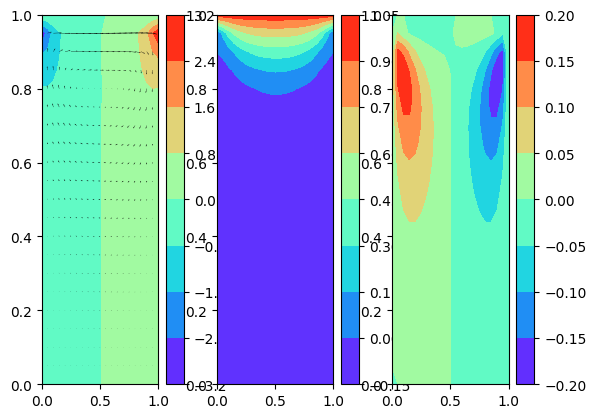

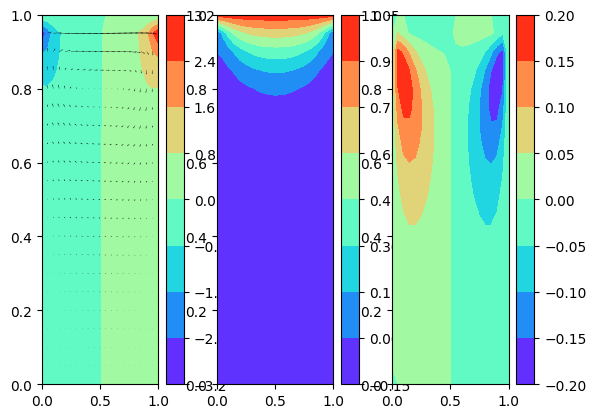

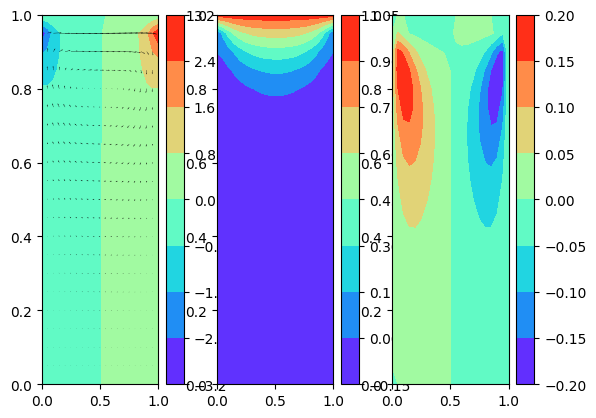

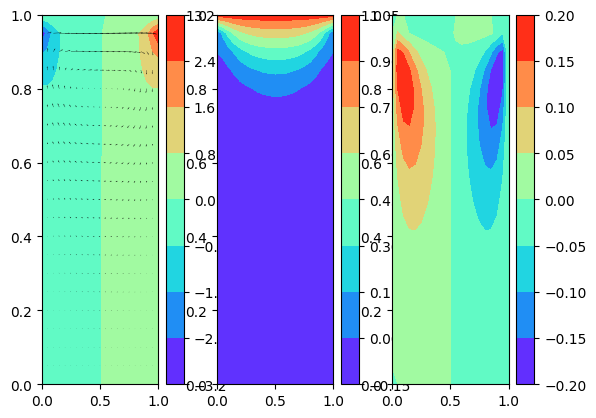

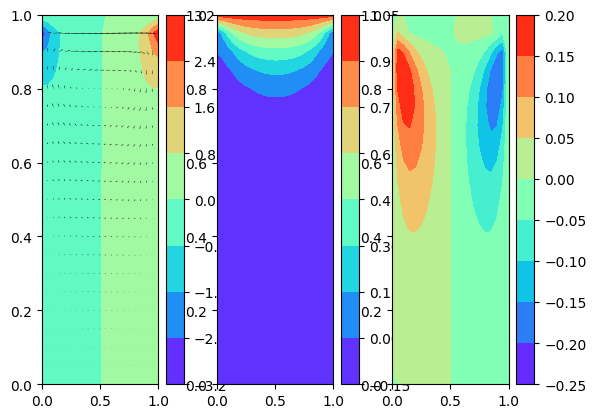

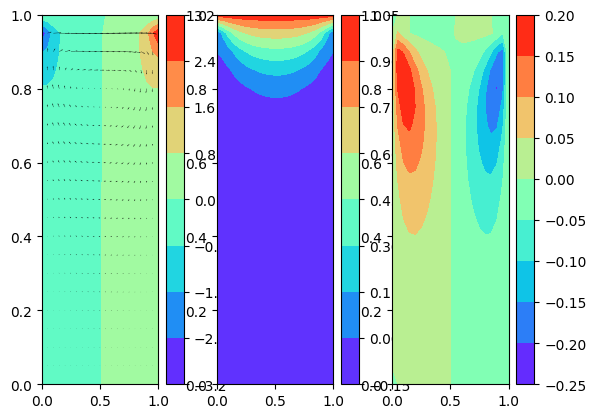

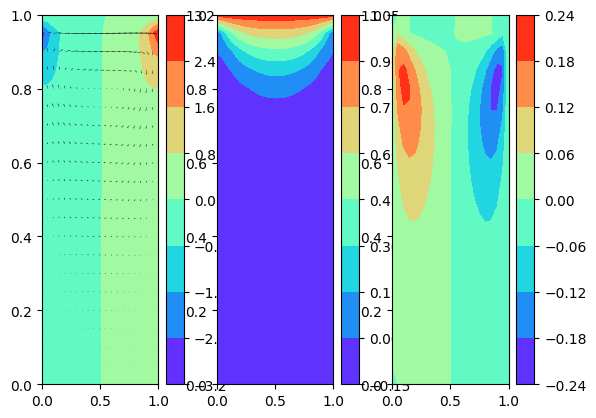

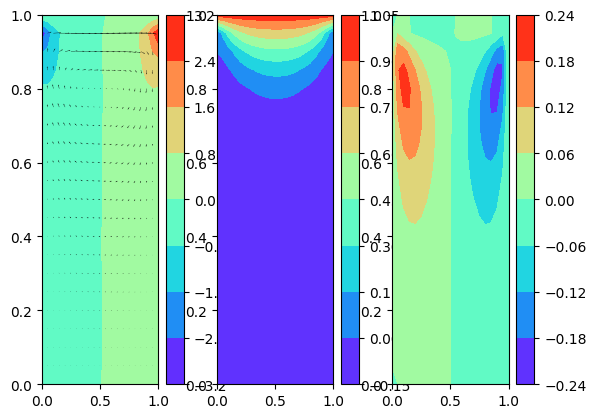

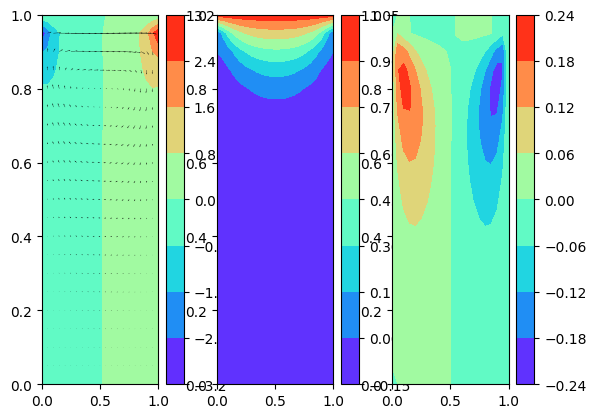

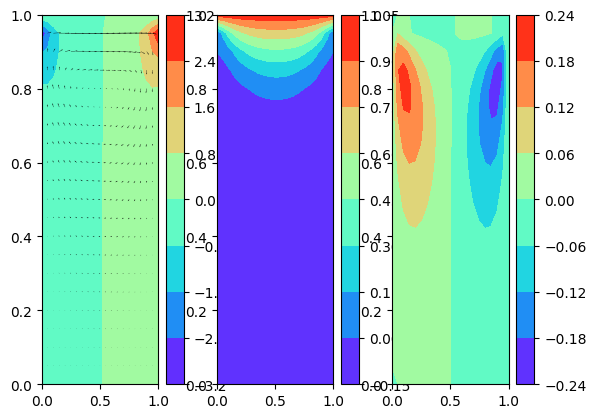

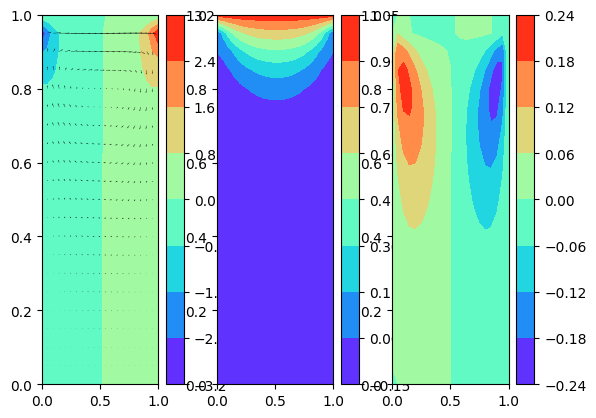

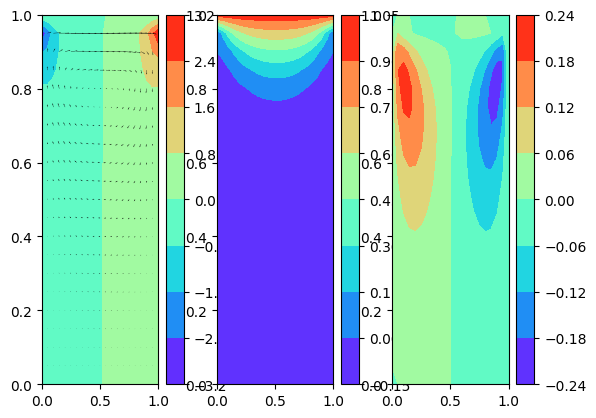

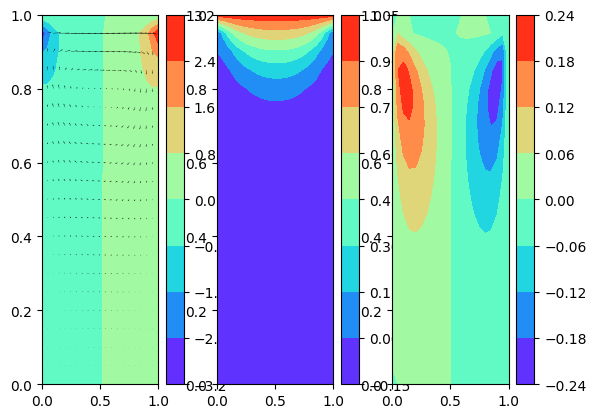

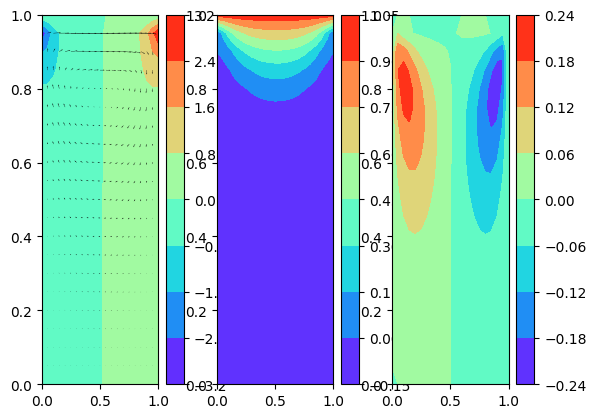

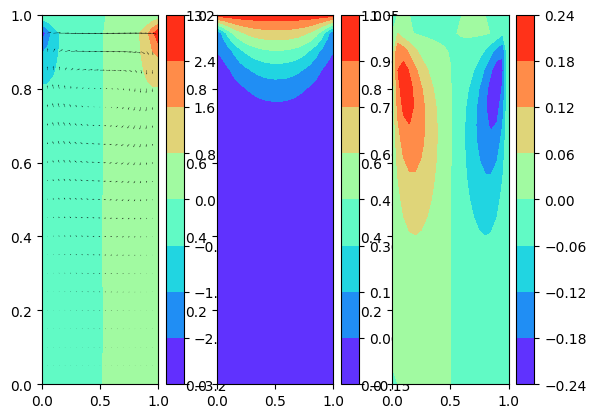

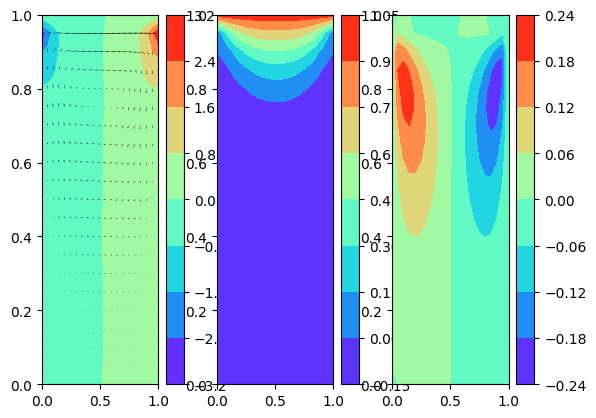

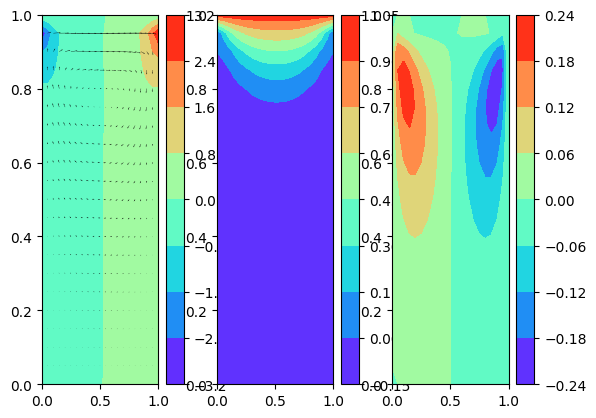

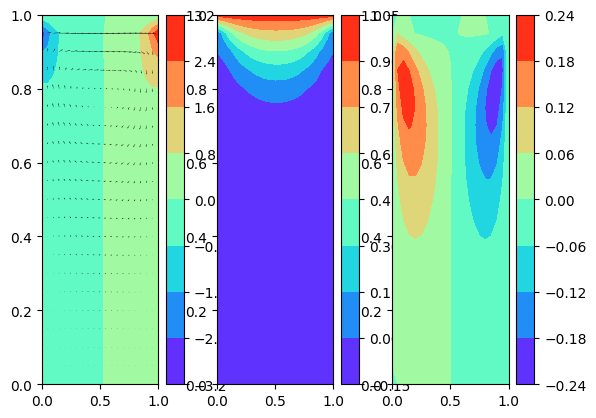

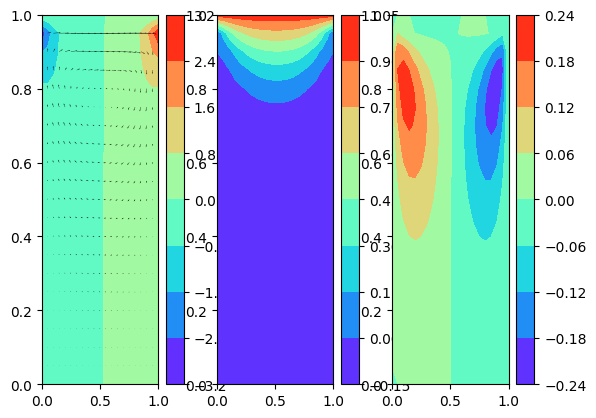

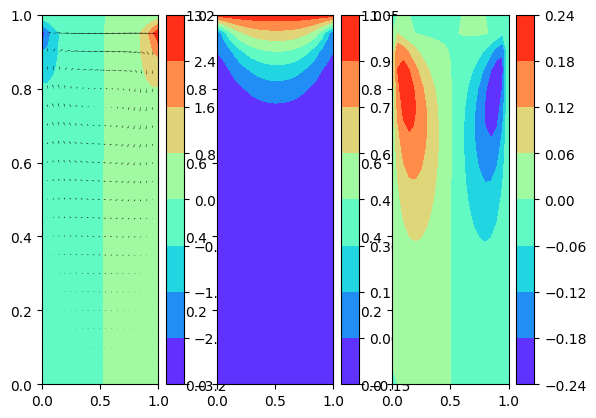

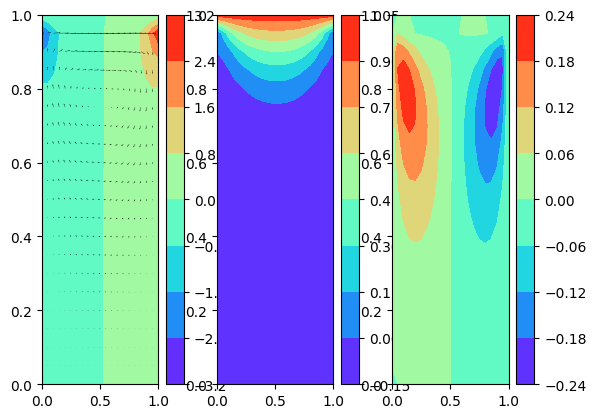

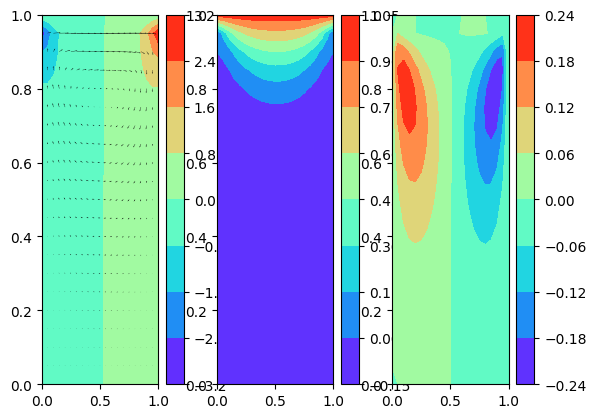

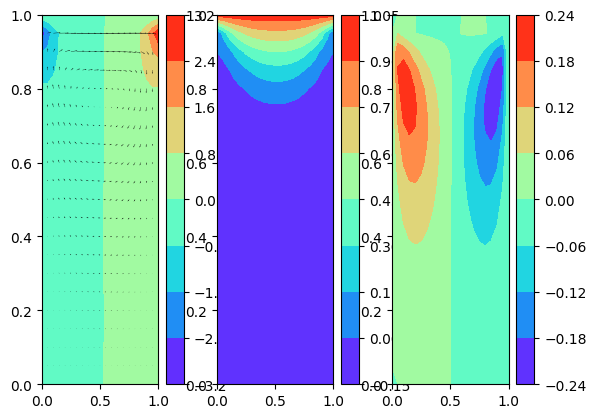

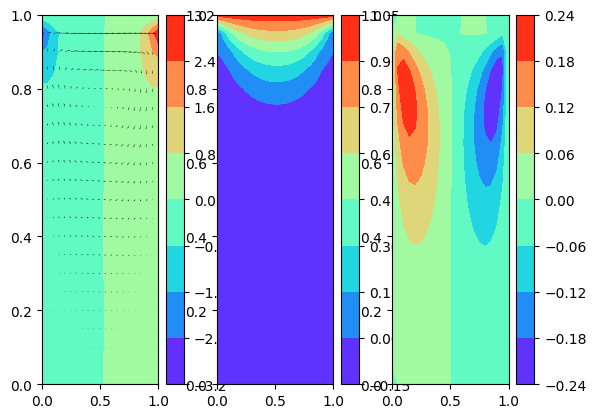

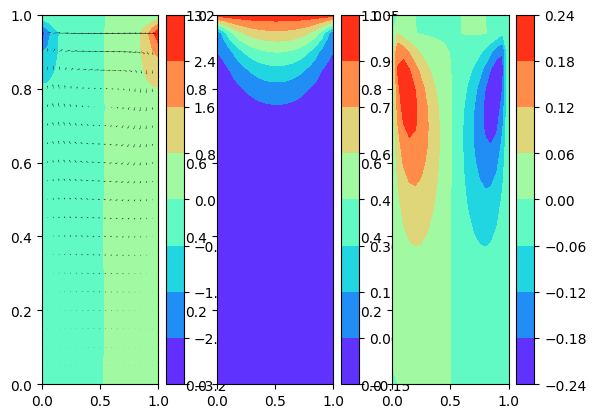

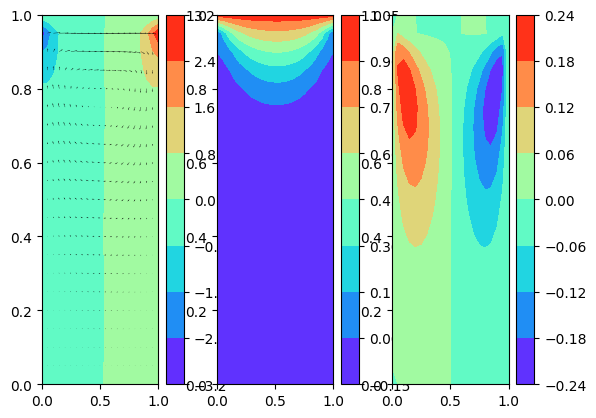

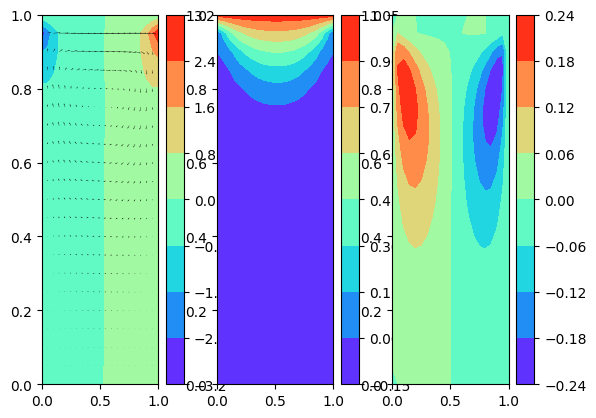

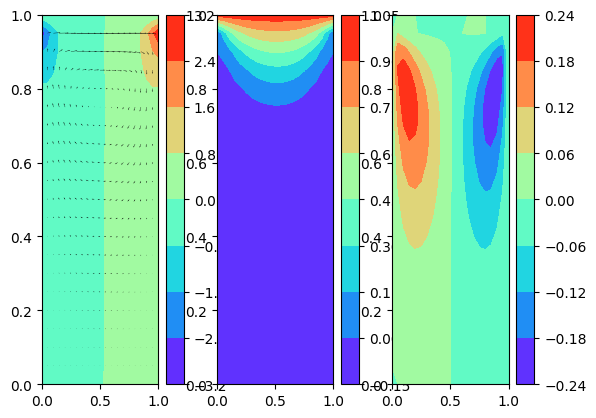

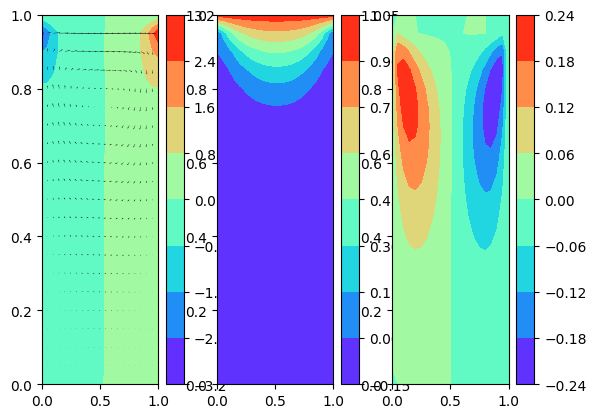

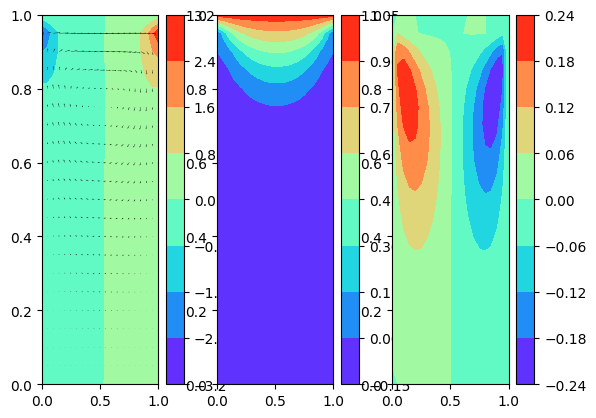

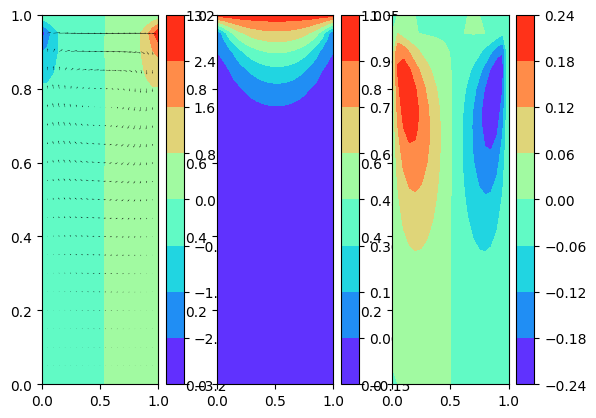

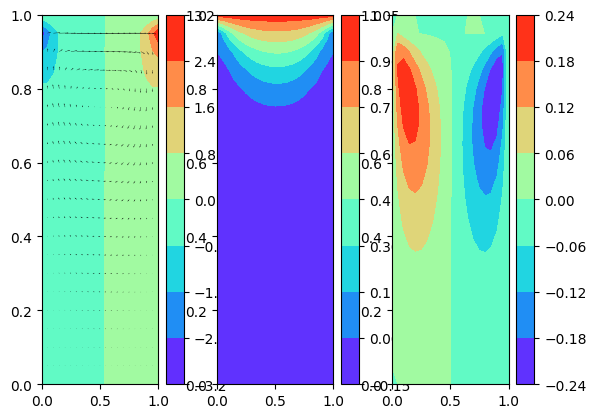

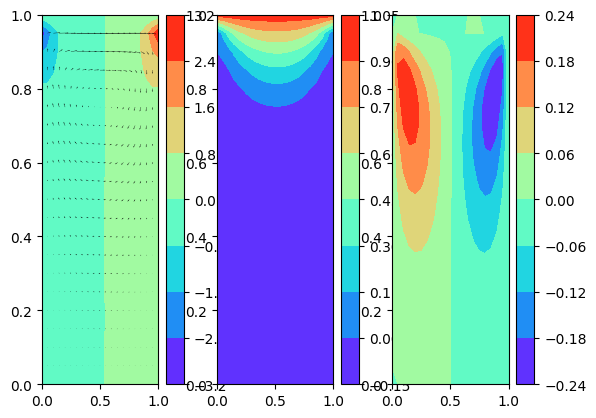

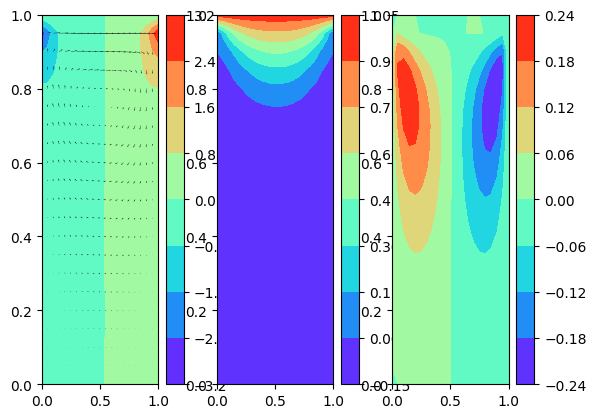

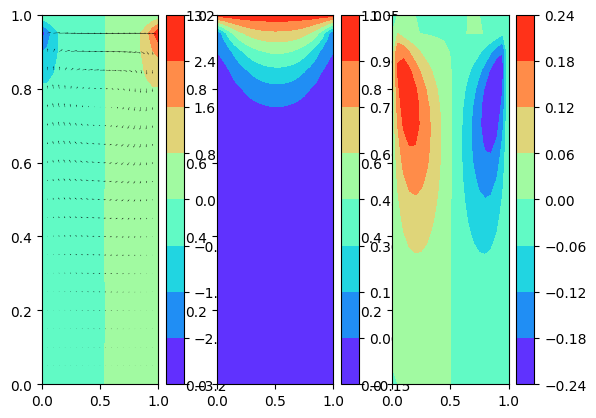

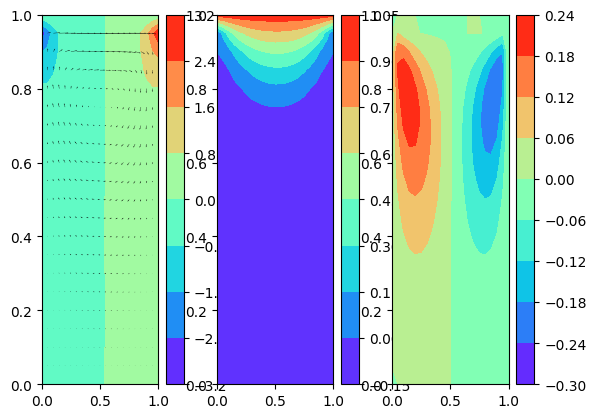

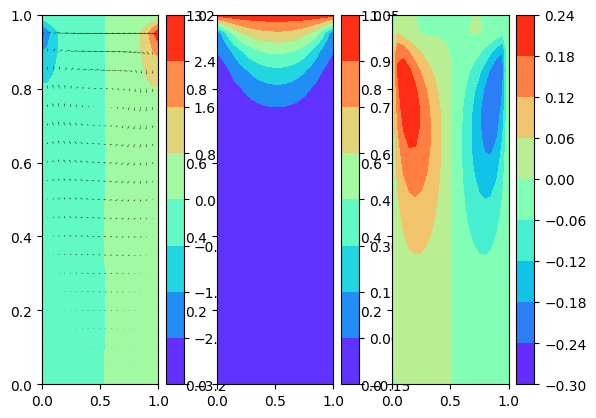

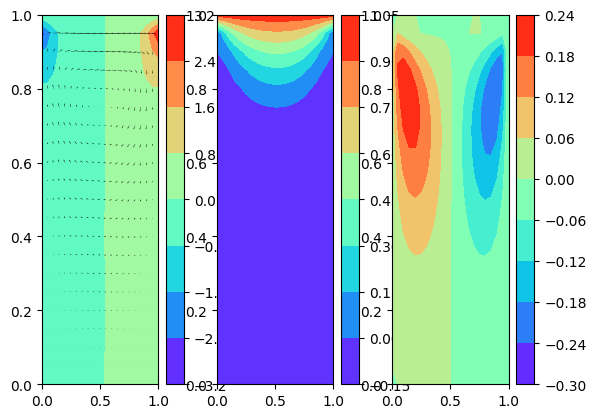

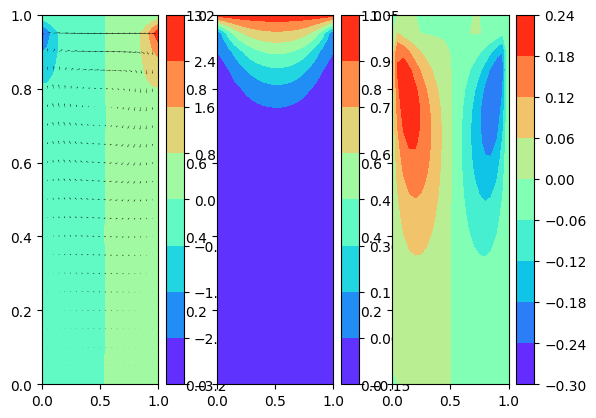

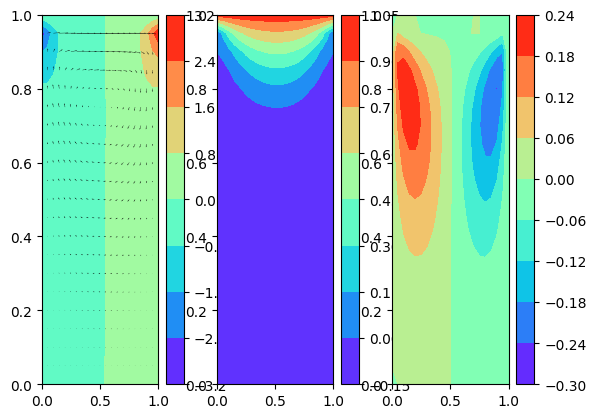

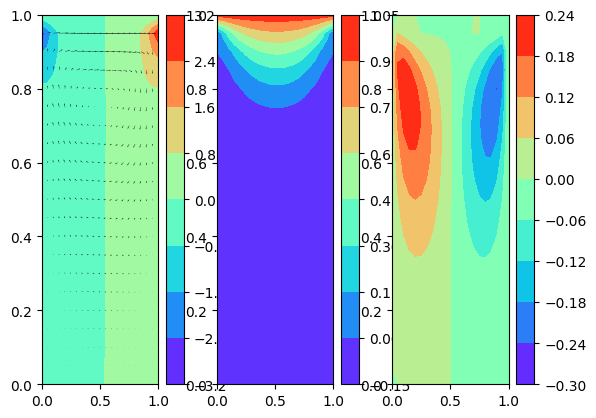

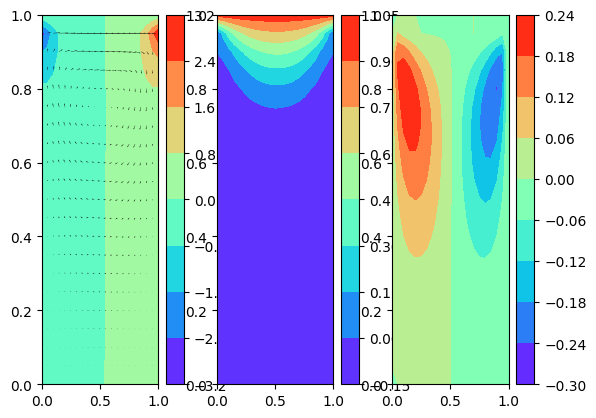

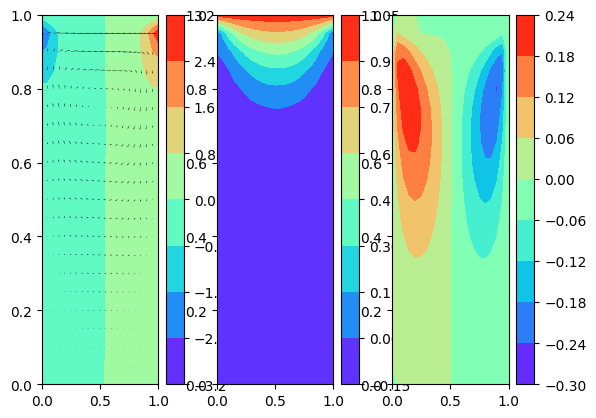

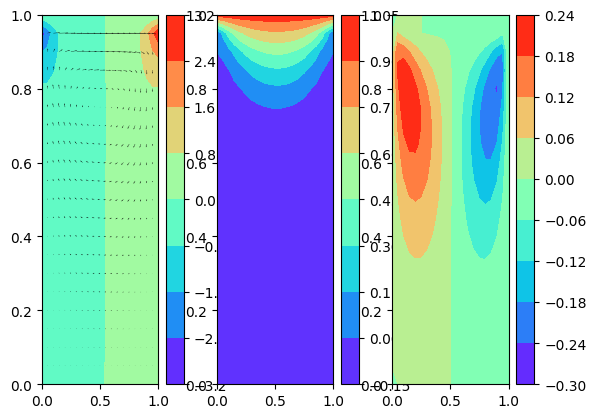

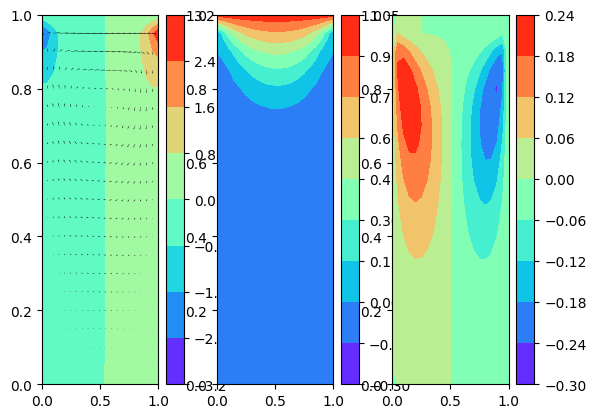

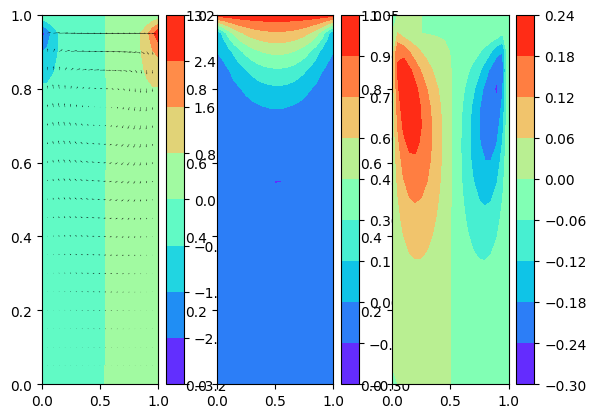

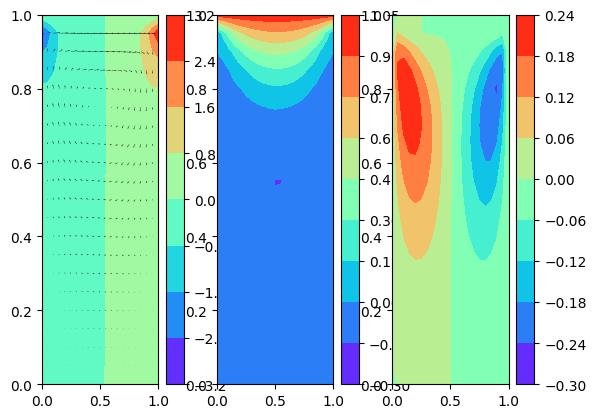

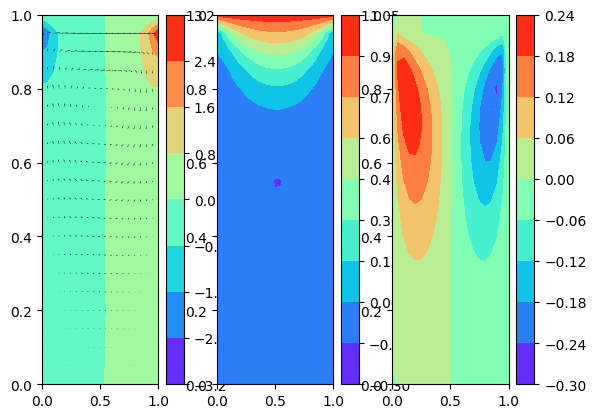

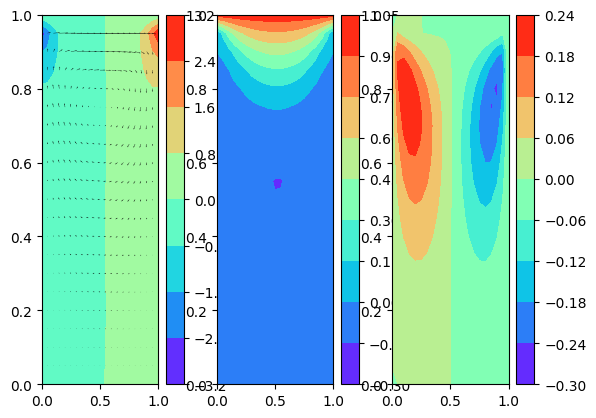

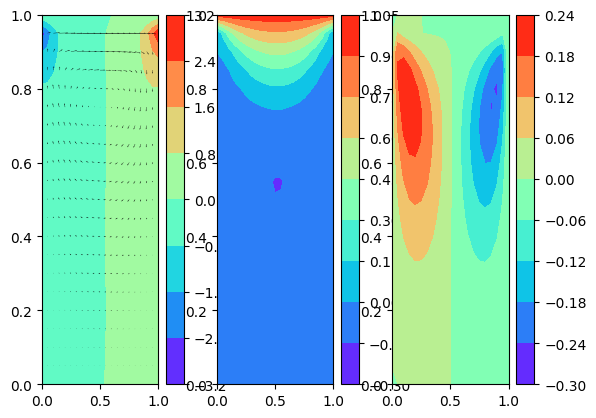

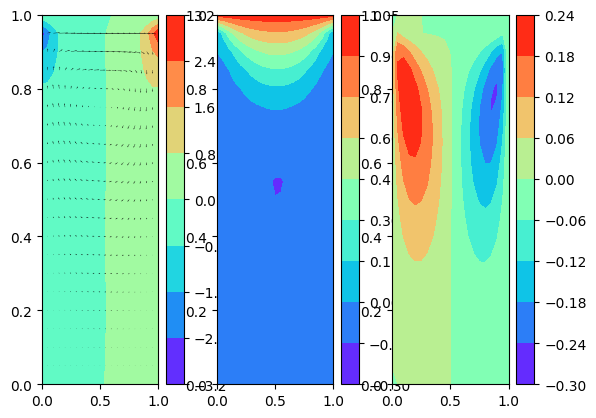

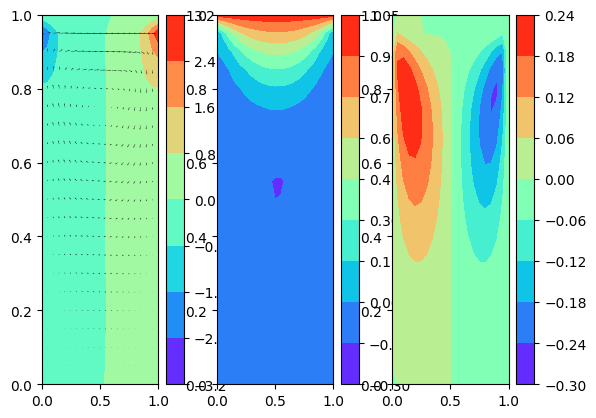

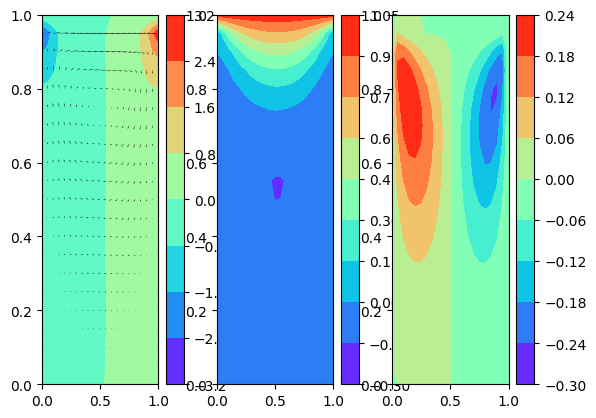

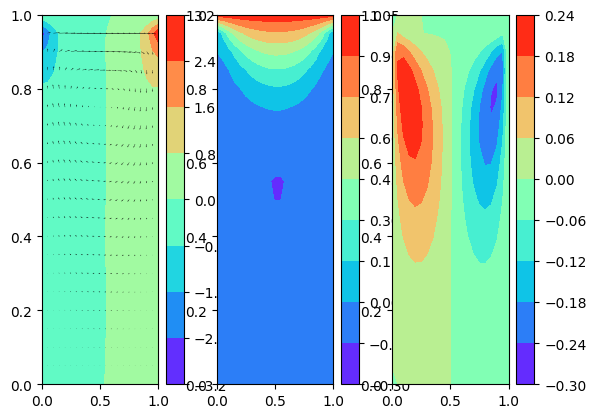

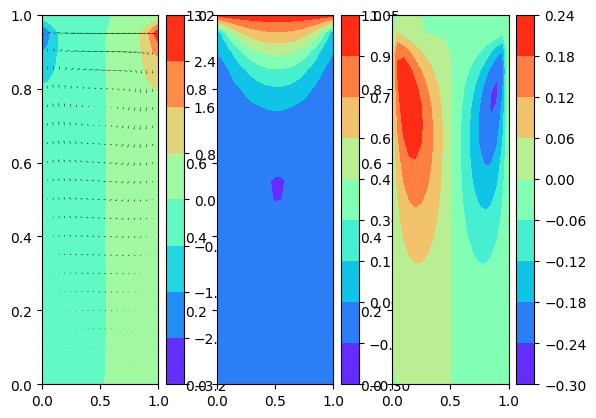

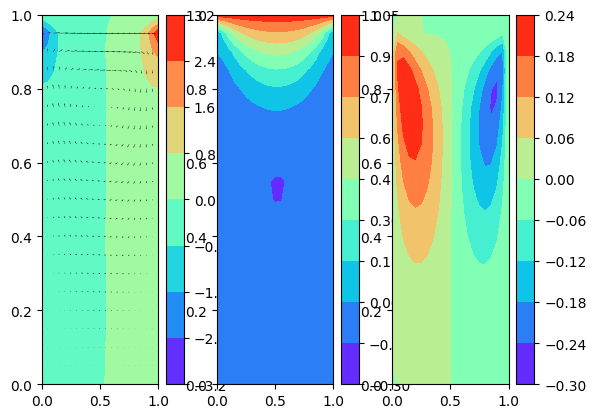

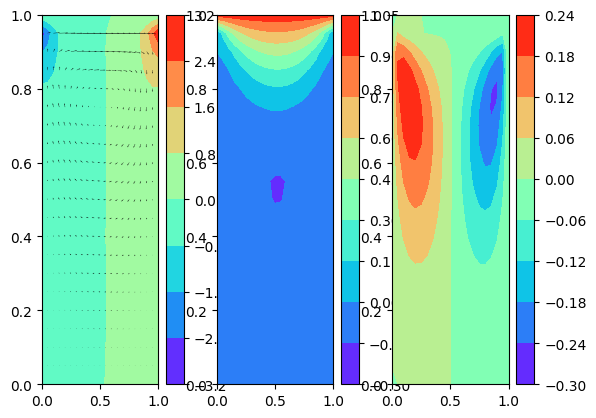

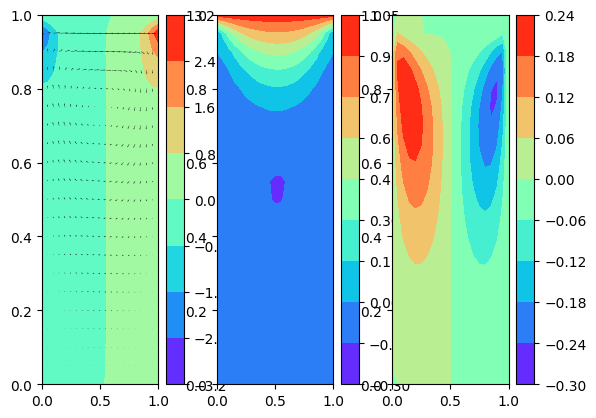

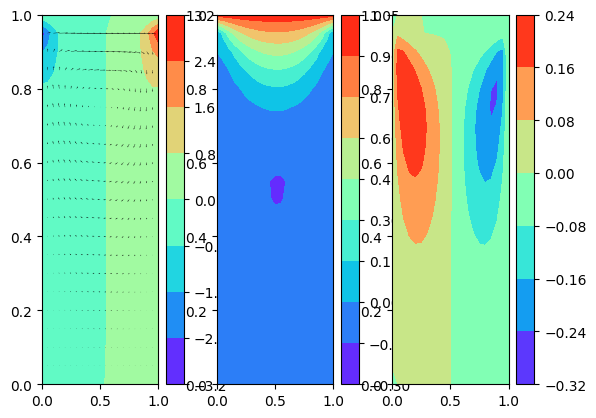

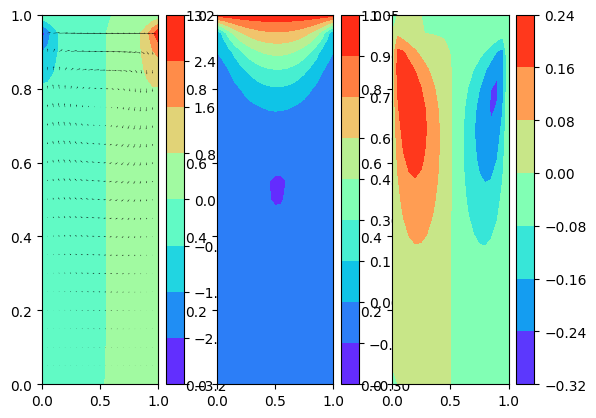

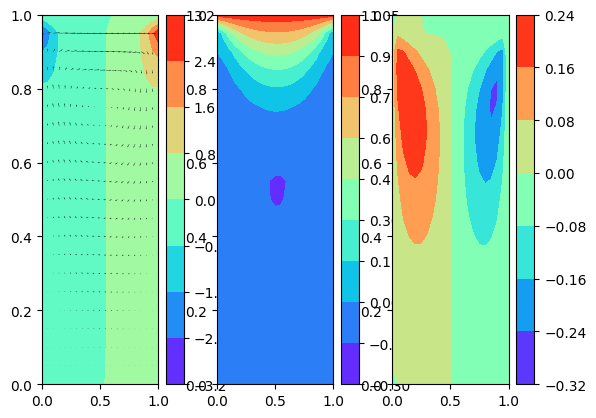

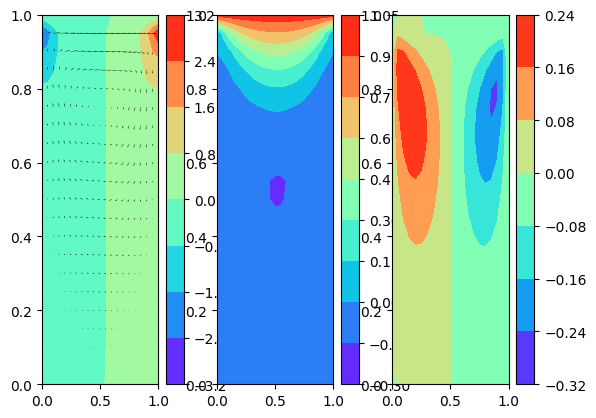

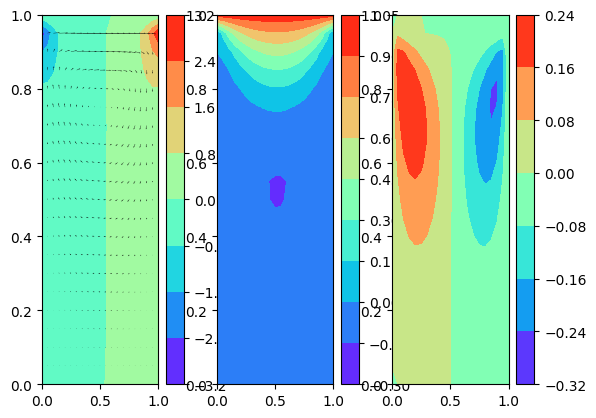

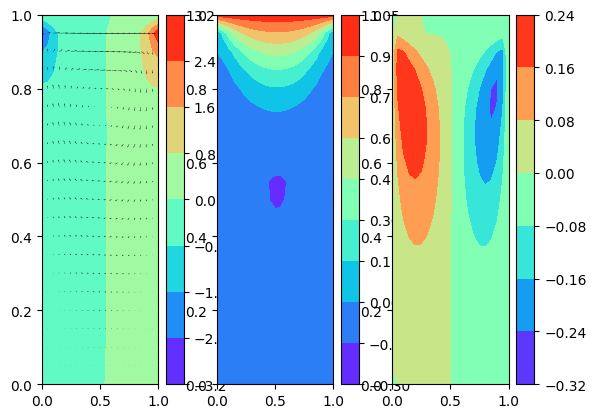

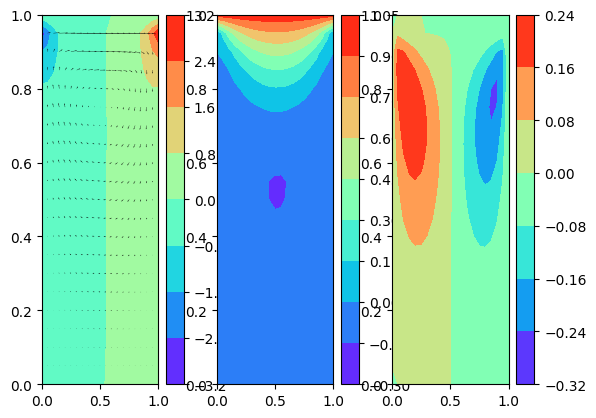

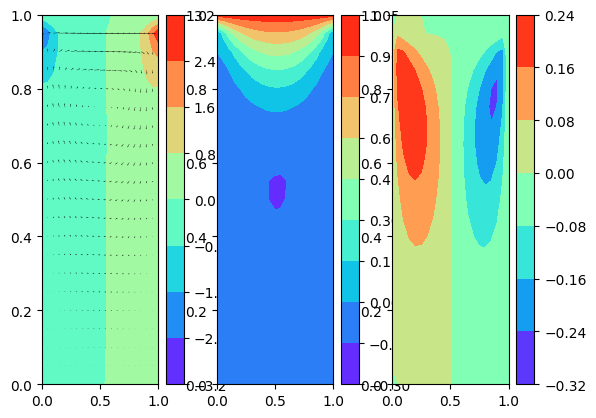

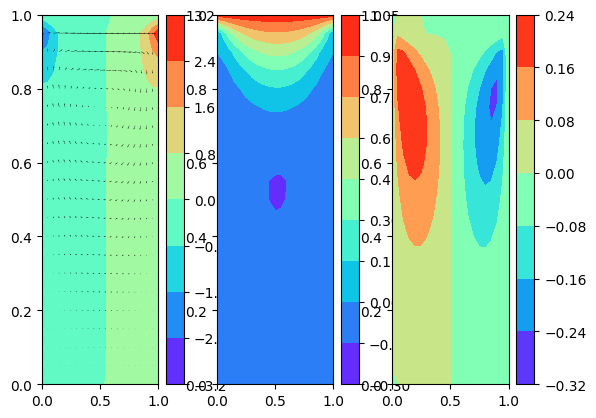

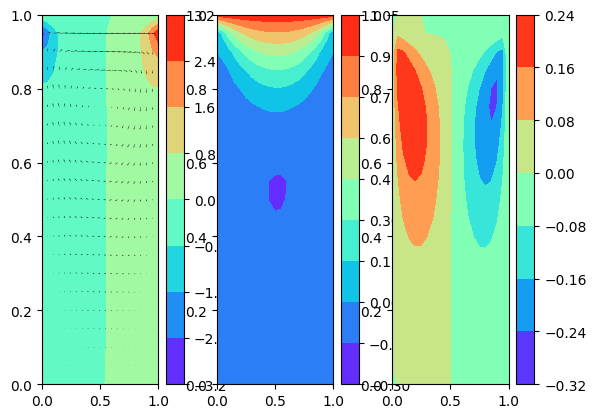

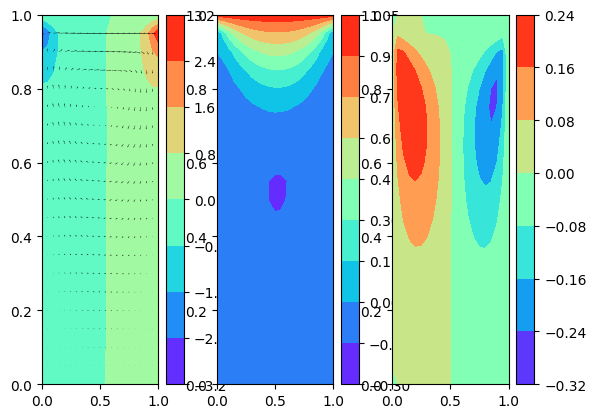

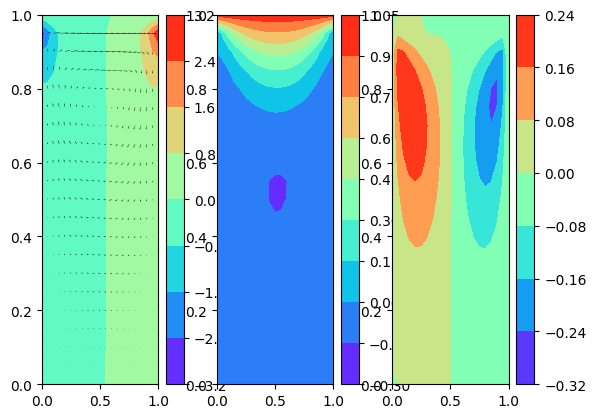

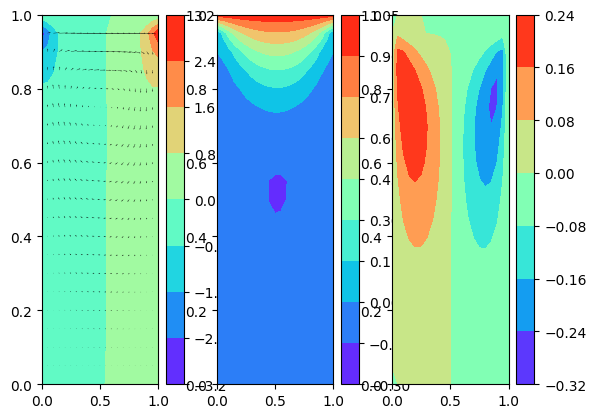

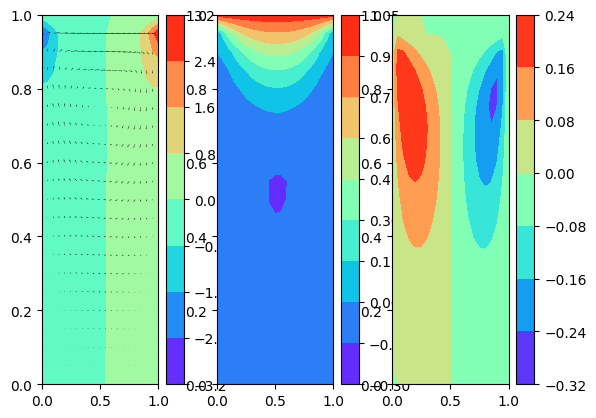

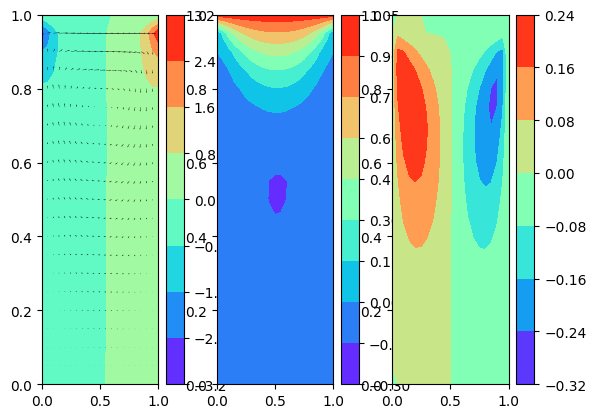

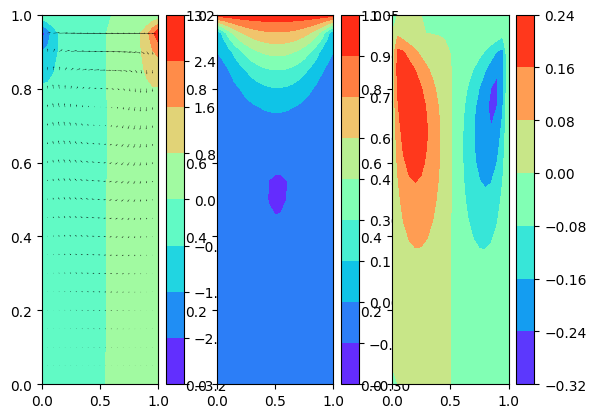

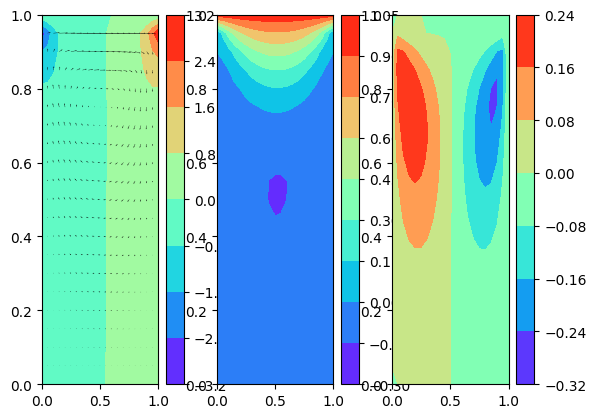

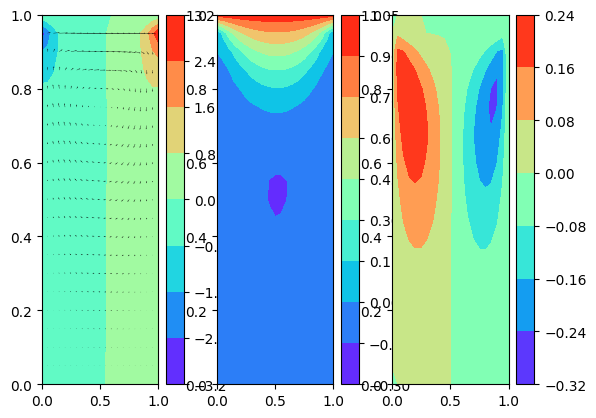

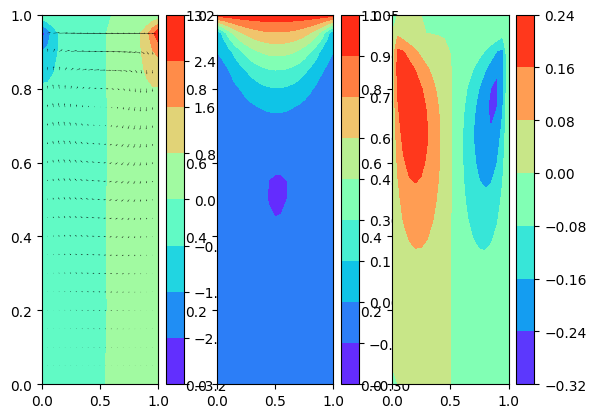

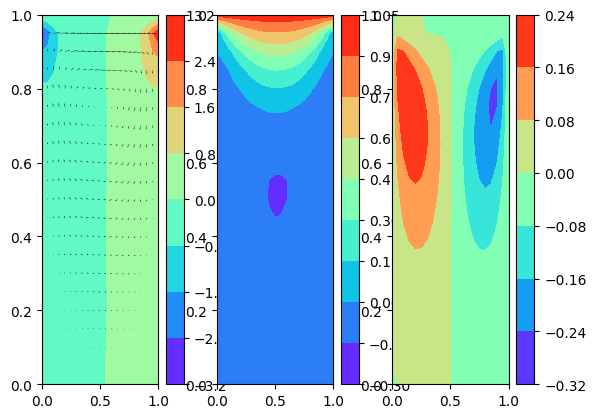

In [11]:
plt.figure(figsize=[12, 4])

for iter in tqdm(range(N_ITERATIONS)):

    # предварительный шаг расчёта vx и vy из уравнений движения withovxt без учёта давления
    vx_tent = (
        vx_prev
        + TIME_STEP_LENGTH * (
            - (vx_prev * ddx(vx_prev) + vy_prev * ddy(vx_prev) )
            + KINEMATIC_VISCOSITY * laplace(vx_prev) )
        )
    vy_tent = (
        vy_prev
        + TIME_STEP_LENGTH * (
            - ( vx_prev * ddx(vy_prev) + vy_prev * ddy(vy_prev) )
            + KINEMATIC_VISCOSITY * laplace(vy_prev) )
        )

    # Задание граничных условий: гомогенные граничные условия по скорости типа Дирихле
    vx_tent[0, :] = 0.0 # vx, нижняя граница
    vx_tent[:, 0] = 0.0 # vx, левая граница
    vx_tent[:, -1] = 0.0 # vx, правая граница
    vx_tent[-1, :] = HORIZONTAL_VELOCITY_TOP # vx, верхняя граница
    vy_tent[0, :] = 0.0 # vy, нижняя граница
    vy_tent[:, 0] = 0.0 # vy, левая граница
    vy_tent[:, -1] = 0.0 # vy, правая граница
    vy_tent[-1, :] = 0.0 # vy, верхняя граница

    # Compute a pressure correction by solving the pressure-poisson equation
    rhs = ( DENSITY / TIME_STEP_LENGTH * ( ddx(vx_tent) + ddy(vy_tent) ) )

    # расчёт давления ∇²p = ρ/Δt ∇ ⋅ u   
    for _ in range(N_PRESSURE_POISSON_ITERATIONS):
        p_next = np.zeros_like(p_prev)
        p_next[1:-1, 1:-1] = 1/4 * (
            + p_prev[1:-1, 0:-2]
            + p_prev[0:-2, 1:-1]
            + p_prev[1:-1, 2:  ]
            + p_prev[2:  , 1:-1]
            - element_length**2
            * rhs[1:-1, 1:-1]
        )

        ### Гомогенные граничные условия по давлению 
        p_next[:, -1] = p_next[:, -2] # правая граница, типа Неймана
        p_next[0,  :] = p_next[1,  :] # нижняя граница, типа Неймана
        p_next[:,  0] = p_next[:,  1] # левая граница, типа Неймана
        p_next[-1, :] = 0.0 #  верхняя граница, типа Дирихле
        p_prev = p_next

    # Correct the velocities such that the flvxid stays incompressible
    vx_next = ( vx_tent - TIME_STEP_LENGTH / DENSITY * ddx(p_next) )
    vy_next = ( vy_tent - TIME_STEP_LENGTH / DENSITY * ddy(p_next) )

    ### Гомогенные граничные условия по скорости типа Дирихле
    vx_next[0, :] = 0.0
    vx_next[:, 0] = 0.0
    vx_next[:, -1] = 0.0
    vx_next[-1, :] = HORIZONTAL_VELOCITY_TOP
    vy_next[0, :] = 0.0
    vy_next[:, 0] = 0.0
    vy_next[:, -1] = 0.0
    vy_next[-1, :] = 0.0

    # Advance in time
    vx_prev = vx_next
    vy_prev = vy_next
    p_prev = p_next

    

    if(iter % 5 == 0):
        # print(iter)
        plt.subplot(1,3,1)
        plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="rainbow")
        plt.colorbar()
        plt.quiver(X[::2, ::2], Y[::2, ::2],
                   vx_next[::2, ::2], vy_next[::2, ::2], color="black")
        
        plt.subplot(1,3,2)
        plt.contourf(X[::2, ::2], Y[::2, ::2], vx_next[::2, ::2], cmap="rainbow")
        plt.colorbar()
        
        plt.subplot(1,3,3)
        plt.contourf(X[::2, ::2], Y[::2, ::2], vy_next[::2, ::2], cmap="rainbow")
        plt.colorbar()
        plt.show()

# Простая визуализация результатов

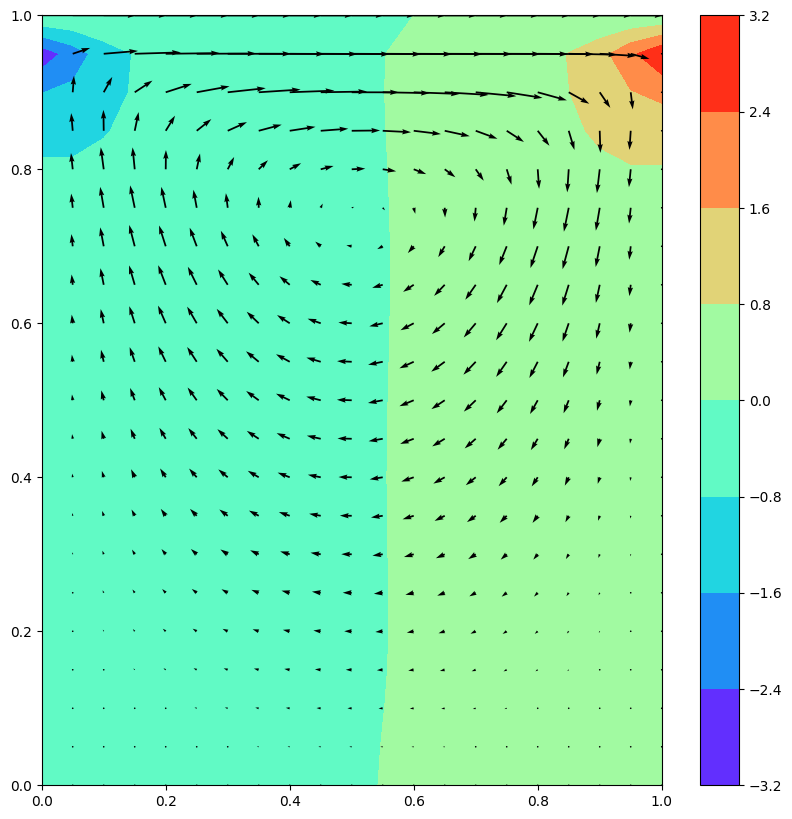

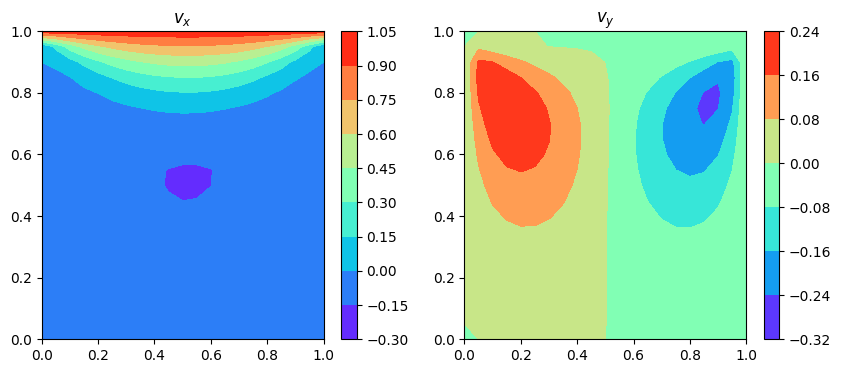

In [12]:
# plt.style.use("dark_background")
plt.figure(figsize=[10, 10])
# plt.set_title("Давление и вектора скорости")

# plt.subplot(3,2,1)
# контурный график давления
plt.contourf(X[::2, ::2], Y[::2, ::2], p_next[::2, ::2], cmap="rainbow")
plt.colorbar()

# линии тока
# plt.streamplot(X[::2, ::2], Y[::2, ::2],
#                vx_next[::2, ::2], vy_next[::2, ::2], color="black")

# векторное поле
plt.quiver(X[::2, ::2], Y[::2, ::2],
           vx_next[::2, ::2], vy_next[::2, ::2], color="black")

plt.figure(figsize=[10, 4])
# график v_x
plt.subplot(1,2,1, title="${v_x}$")
plt.contourf(X[::2, ::2], Y[::2, ::2], vx_next[::2, ::2], cmap="rainbow")
plt.colorbar()

# график v_y
plt.subplot(1,2,2, title="${v_y}$")
plt.contourf(X[::2, ::2], Y[::2, ::2], vy_next[::2, ::2], cmap="rainbow")
plt.colorbar()

# plt.xlim((0, 1))
# plt.ylim((0, 1))
# plt.show()